In [4]:
from algorithms.apdrcd import apdrcd
from algorithms.sa_apdrcd import sa_apdrcd

import numpy as np
import sys
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
n = 100
m = 100

np.random.seed(101)
r = np.random.rand(n)
np.random.seed(102)
l = np.random.rand(m)
r = r / np.sum(r)
l = l / np.sum(l)
np.random.seed(111)
C = 10*np.random.rand(n,m)

In [8]:
eta = 1
maxIter = 4000

In [31]:
x1 = np.zeros(n*m)
x2 = np.zeros(n*m)
ii = np.arange(maxIter)
err1 = []
err2 = []
time1 = []
time2 = []
ot1 = []
ot2 = []

In [32]:
x1, err1, time1, ot1 = apdrcd(r, l, C, eta, maxIter, err_flag=1, time_flag=1, value_flag=1)
x2, err2, time2, ot2 = sa_apdrcd(r, l, C, eta, maxIter, err_flag=1, time_flag=1, value_flag=1)

TypeError: 'numpy.float64' object does not support item assignment

### Error - Iteration

In [58]:
fig, ax = plt.subplots(facecolor="w")
ax.plot(ii, err1, label="original")
ax.plot(ii, err2, label="sparsity-aware")
ax.legend()
ax.set_xlabel("iteration")
ax.set_ylabel("$||Ax-b||_1$")
plt.show()

### Time (s) - Iteration

In [ ]:
fig, ax = plt.subplots(facecolor="w")
ax.plot(ii, time1, label="original")
ax.plot(ii, time2, label="sparsity-aware")
ax.legend()
ax.set_xlabel("iteration")
ax.set_ylabel("time (s)")
plt.show()

### OT-value - Iteration

In [ ]:
fig, ax = plt.subplots(facecolor="w")
ax.plot(ii, ot1, label="original")
ax.plot(ii, ot2, label="sparsity-aware")
ax.legend()
ax.set_xlabel("iteration")
ax.set_ylabel("ot_value")
plt.show()

### Transport Matrix

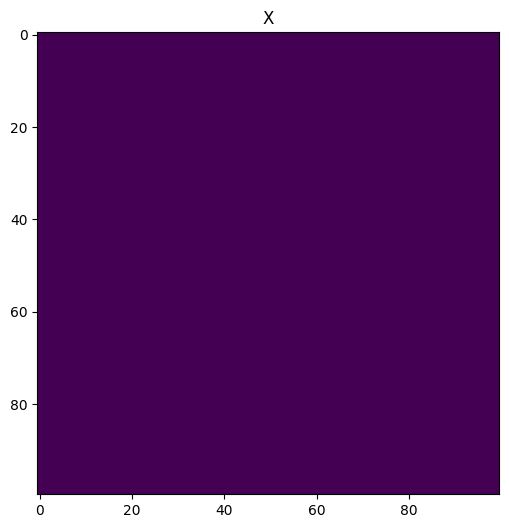

In [13]:
x1 = np.ones(n*m)
X = np.reshape(x1, [n,m])

fig = plt.figure(figsize=(8,6))
plt.imshow(X)
plt.title("X")
plt.show()